Create a relational database using MySQL and connect it to Python:

In [1]:
# NOTE: since SQL commands cannot be repeated (the changes are saved the first time), the cells where SQL commands
# take place are not run in the final loop

# First, we download, setup and create a local MySQL community server

# Then we import the relevant module:

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rootserver",
  database="mydatabase"
)

# With the cursor we can start playing with the SQL database

mycursor = mydb.cursor()

In [ ]:
# Create new database

mycursor.execute("CREATE DATABASE mydatabase")

mycursor.execute("CREATE TABLE players (name VARCHAR(255), team VARCHAR(255), score VARCHAR(255))")


In [ ]:
# We now add a unique ID/Primary Key

mycursor.execute("ALTER TABLE players ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY")


In [ ]:
# Now we add data simulating basic FIFA players data:

sql = "INSERT INTO players (name, team, score) VALUES (%s, %s, %s)"

# We use %s to avoid security breaches

val = [
  ('Messi', 'PSG', 91),
  ('Ronaldo', 'United', 90),
  ('Mbappe', 'PSG', 93),
  ('Emerson', 'City', 93),
  ('Griezmann', 'Atlético', 88),
  ('Kane', 'Spurs', 90),
  ('Kanté', 'Chelsea', 89),
  ('Ter Stegen', 'Barcelona', 91),
]

mycursor.executemany(sql, val)

mydb.commit()


Show you can build some easy queries and translate the document into a Pandas Dataframe:

In [ ]:
# We change the data type of the score column, from characters to numbers:

mycursor.execute("ALTER TABLE players CHANGE score score INT")

In [2]:
# We order the players from best to worst, and we print the result:

mycursor.execute("SELECT * FROM players ORDER BY score DESC")

myresult = mycursor.fetchall()

for x in myresult:
      print(x)


('Mbappe', 'PSG', 93, 3)
('Emerson', 'City', 93, 4)
('Messi', 'PSG', 91, 1)
('Ter Stegen', 'Barcelona', 91, 8)
('Ronaldo', 'United', 90, 2)
('Kane', 'Spurs', 90, 6)
('Kanté', 'Chelsea', 89, 7)
('Griezmann', 'Atlético', 88, 5)


In [3]:
# We import Pandas and transform the database into a dataframe:

import pandas as pd

mycursor.execute("SELECT * FROM players ORDER BY score DESC")

df = pd.DataFrame(mycursor.fetchall(), columns=("Name", "Team", "Score", "SQL_ID"))

df.head()

,Name,Team,Score,SQL_ID
0,Mbappe,PSG,93,3
1,Emerson,City,93,4
2,Messi,PSG,91,1
3,Ter Stegen,Barcelona,91,8
4,Ronaldo,United,90,2


Generate a graph summing up the data:

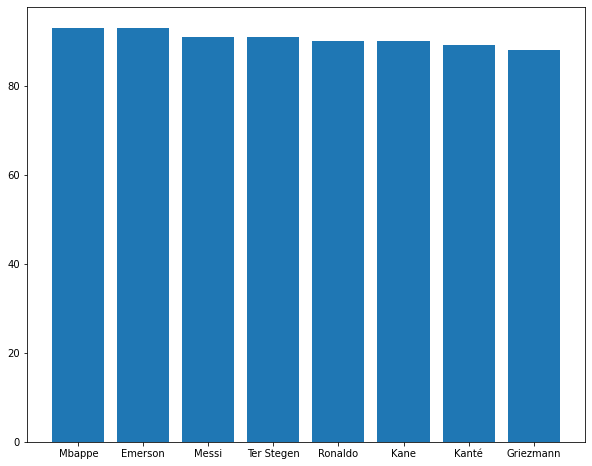

In [4]:
# Import Pyplot and make a simple graph showing the best to worst players:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.bar(df["Name"], df["Score"])
plt.show()
